### Neural networks and deep learning

### Dataset
[clothing dataset link](https://github.com/alexeygrigorev/clothing-dataset-small)

### Study

[Stanford](https://cs231n.github.io/)


In [1]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

In [2]:
# tensorflow and Keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

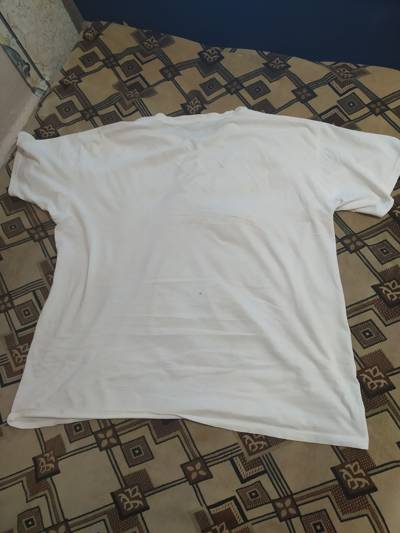

In [6]:
path = "./clothing-dataset-small/train/t-shirt"
name = "0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg"
fullname = f"{path}/{name}"
load_img(fullname)

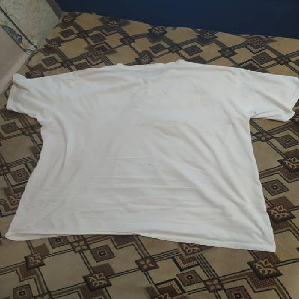

In [7]:
img = load_img(fullname, target_size=(299,299))
img

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

### Transfer Learning

In [12]:

from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [25]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [26]:
train_ds = train_gen.flow_from_directory("./clothing-dataset-small/train", 
                                        target_size=(150,150), 
                                        batch_size=32)

val_ds = val_gen.flow_from_directory("./clothing-dataset-small/validation", 
                                        target_size=(150,150), 
                                        batch_size=32,
                                        shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
X, y = next(train_ds)

In [22]:
X

array([[[[ 0.05882359, -0.1372549 , -0.29411763],
         [ 0.27843142,  0.082353  , -0.1607843 ],
         [ 0.27843142,  0.05882359, -0.25490195],
         ...,
         [ 0.4039216 ,  0.27843142, -0.00392157],
         [ 0.38823533,  0.27058828, -0.03529412],
         [ 0.4039216 ,  0.28627455, -0.03529412]],

        [[ 0.19215691,  0.12156868,  0.06666672],
         [ 0.70980394,  0.6627451 ,  0.5529412 ],
         [ 0.9372549 ,  0.9137255 ,  0.7647059 ],
         ...,
         [ 0.5058824 ,  0.3803922 ,  0.11372554],
         [ 0.4901961 ,  0.36470592,  0.082353  ],
         [ 0.41960788,  0.30196083, -0.00392157]],

        [[ 0.8745098 ,  0.7490196 ,  0.62352943],
         [ 0.8745098 ,  0.77254903,  0.62352943],
         [ 0.92941177,  0.8666667 ,  0.7019608 ],
         ...,
         [ 0.52156866,  0.39607847,  0.13725495],
         [ 0.3803922 ,  0.254902  , -0.01176471],
         [ 0.37254906,  0.24705887, -0.01960784]],

        ...,

        [[ 0.15294123, -0.05098039, -0

In [23]:
y

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

83683744/83683744 [==============================] - 27s 0us/step


In [54]:
inputs = keras.Input(shape=(150,150,3))


base_model = Xception(weights="imagenet", 
                    include_top=False, 
                    input_shape=(150,150,3))

base_model.trainable = False
base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [55]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 1s 850ms/step


(32, 10)

In [56]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [57]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 36s 364ms/step - loss: 1.2569 - accuracy: 0.6741 - val_loss: 0.8772 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 36s 378ms/step - loss: 0.6079 - accuracy: 0.8181 - val_loss: 0.9848 - val_accuracy: 0.7625
Epoch 3/10
96/96 [==============================] - 36s 380ms/step - loss: 0.3973 - accuracy: 0.8651 - val_loss: 0.8531 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 36s 376ms/step - loss: 0.2221 - accuracy: 0.9188 - val_loss: 0.9069 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 36s 376ms/step - loss: 0.1423 - accuracy: 0.9521 - val_loss: 0.9180 - val_accuracy: 0.8240
Epoch 6/10
96/96 [==============================] - 36s 375ms/step - loss: 0.0980 - accuracy: 0.9641 - val_loss: 0.9599 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 36s 373ms/step - loss: 0.0673 - accuracy: 0.9759 - val_loss: 1.0110 - val_accuracy: 0.7771

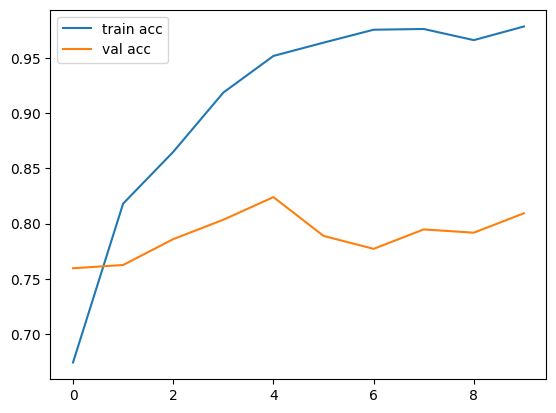

In [58]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()